<a href="https://colab.research.google.com/github/janakimeena/Python-for-Data-Science/blob/master/nptel_DS_CS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cars = pd.read_csv('cars_sampled.csv')
cars_d = cars.copy() #deep copy
cars_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 19 columns):
dateCrawled            6228 non-null object
name                   6227 non-null object
seller                 6227 non-null object
offerType              6227 non-null object
price                  6227 non-null float64
abtest                 6227 non-null object
vehicleType            5593 non-null object
yearOfRegistration     6227 non-null float64
gearbox                5878 non-null object
powerPS                6227 non-null float64
model                  5903 non-null object
kilometer              6227 non-null float64
monthOfRegistration    6227 non-null float64
fuelType               5672 non-null object
brand                  6227 non-null object
notRepairedDamage      4978 non-null object
dateCreated            6227 non-null object
postalCode             6227 non-null float64
lastSeen               6227 non-null object
dtypes: float64(6), object(13)
memory usage: 924.6+

In [0]:
cars_d.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,6.227000e+03,6227.000000,6227.000000,6227.000000,6227.000000,6227.000000
mean,7.392318e+03,2003.365826,114.730207,125393.447888,5.747872,50489.354424
std,1.271162e+05,7.887099,177.304752,40409.456781,3.681378,25625.981795
min,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,1099.000000
25%,1.150000e+03,1999.000000,69.000000,100000.000000,3.000000,30419.000000
50%,2.999000e+03,2003.000000,105.000000,150000.000000,6.000000,49170.000000
75%,7.399500e+03,2008.000000,150.000000,150000.000000,9.000000,71093.000000
max,1.001001e+07,2019.000000,12512.000000,150000.000000,12.000000,99974.000000


In [0]:
# remove scientific notation for decimal values
pd.set_option('display.float_format',lambda x:'%.3f' %x)

In [0]:
# display maximum set of columns
pd.set_option('display.max_columns',500)

In [0]:

cars.describe()


In [0]:
# dropping unwanted columns
col = ['name', 'dateCrawled','postalCode','lastSeen']
cars = cars_d.drop(columns=col,axis=1)

In [0]:
# removing duplicate records
cars_d.drop_duplicates(keep='first',inplace=True)

In [0]:
#number of missing values in each column
cars_d.isnull().sum()

In [0]:
yearwise = cars['yearOfRegistration'].value_counts().sort_index()
# if sort_index is not given then the values will be sorted based on frequency. We want to print based on year

In [0]:
print(yearwise)

In [0]:
# little bit of analysis on the data
sum(cars_d['yearOfRegistration']>2018)

In [0]:
sum(cars_d['yearOfRegistration']<1950)

In [0]:
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars_d)

In [0]:
price_count = cars_d['price'].value_counts().sort_index()


In [0]:
cars_d=cars_d.dropna(axis=0,how='any')

In [0]:
sns.distplot(cars_d['price'])

In [0]:
cars_d.info()

In [0]:
cars_d['price'].describe()

In [0]:
# plotting box plot says about outliers when you cannot see a box then it means there is a lot of outlier
sns.boxplot(y=cars_d['price'])

In [0]:
sum(cars['price']>150000)

In [0]:
sum(cars['price']<100)

In [0]:
power = cars_d['powerPS'].value_counts().sort_index()
print(power)

In [0]:
cars_d['powerPS'].describe()

In [0]:
sns.boxplot(y=cars_d['powerPS'])

In [0]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars_d)

In [0]:
sum(cars_d['powerPS']>500)

In [0]:
sum(cars_d['powerPS']<10)

In [0]:
cars = cars_d[(cars_d.yearOfRegistration<=2018)
& (cars_d.yearOfRegistration >= 1950)
& (cars_d.price >= 100)
& (cars_d.price <= 150000)
& (cars_d.powerPS >= 10)
& (cars_d.powerPS <= 500)]

In [0]:
print(cars)

           dateCrawled                                               name  \
1        7/3/2016 9:54                             Volvo_XC90_2.4D_Summum   
3     19/03/2016 17:50                       Seat_Ibiza_1.4_16V_Reference   
4     16/03/2016 14:51  Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...   
5       2/4/2016 12:51           VW_Passat_35i_Facelift_Limousine_TÜV_Neu   
7     24/03/2016 15:52                        Mercedes_Benz_CLK_Coupe_200   
...                ...                                                ...   
6219   24/03/2016 1:54                         Opel_Corsa_1.0_12V_Comfort   
6220    3/4/2016 16:06              Audi_Q7_3.0_TDI_DPF_quattro_tiptronic   
6221  21/03/2016 15:49  Mercedes_Benz_C_220_T_CDI_DPF_Automatik_BlueEF...   
6223  15/03/2016 22:45                                     Citroën_C2_1.4   
6224    5/3/2016 14:25                  Ford_Mondeo_2.0_Turnier_TDCi_Ghia   

       seller offerType     price   abtest    vehicleType  yearOfRegistrati

In [0]:
cars['monthOfRegistration']/=12

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
print(cars.monthOfRegistration)

In [0]:
cars['Age'] = (2018 -cars['yearOfRegistration'])+cars['monthOfRegistration']
cars["Age"] = round(cars['Age'],2)
cars.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode,Age
count,4114.000,4114.000,4114.000,4114.000,4114.000,4114.000,4114.000
mean,6811.583,2003.610,129.014,123321.585,0.518,51833.021,14.907
std,8309.569,6.213,61.688,40361.199,0.282,25660.939,6.221
min,100.000,1955.000,18.000,5000.000,0.000,1099.000,2.170
25%,1700.000,2000.000,84.000,100000.000,0.250,31242.250,10.353
50%,4000.000,2004.000,116.000,150000.000,0.500,51066.000,14.500
75%,8990.000,2008.000,160.000,150000.000,0.750,72787.250,18.830
max,139000.000,2016.000,500.000,150000.000,1.000,99974.000,63.500


In [0]:
print(cars['Age'])

In [0]:
cars = cars.drop(columns=['yearOfRegistration','monthOfRegistration'])

In [0]:
cars['Age'] = round(cars['Age'],2)

In [0]:
cars.describe()

,price,powerPS,kilometer,postalCode,Age
count,4114.000,4114.000,4114.000,4114.000,4114.000
mean,6811.583,129.014,123321.585,51833.021,14.907
std,8309.569,61.688,40361.199,25660.939,6.221
min,100.000,18.000,5000.000,1099.000,2.170
25%,1700.000,84.000,100000.000,31242.250,10.353
50%,4000.000,116.000,150000.000,51066.000,14.500
75%,8990.000,160.000,150000.000,72787.250,18.830
max,139000.000,500.000,150000.000,99974.000,63.500


In [0]:
sns.distplot(cars['Age'])

In [0]:
sns.boxplot(y = cars['Age'])

In [0]:
sns.distplot(cars['price'])
sns.boxplot(y = cars['price'])

In [0]:
sns.distplot(cars['powerPS'])
sns.boxplot(y = cars['powerPS'])

In [0]:
sns.regplot(x='Age',y='price',scatter=True,fit_reg=False,data=cars)

In [0]:
cars['seller'].value_counts()

private    4114
Name: seller, dtype: int64

In [0]:
pd.crosstab(cars['seller'],columns='count',normalize=True)


col_0,count
seller,
private,1.000


In [0]:
sns.countplot(x='seller',data=cars)

In [0]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.477
test,0.523


In [0]:
sns.countplot(x='abtest',data=cars)

In [0]:
sns.boxplot(x='abtest',y='price',data=cars)
# equally distributed
# for every price value there is almost 50-50 distribution
# Does not affect price => Insignificant

In [0]:
cars['vehicleType'].value_counts()

limousine        1279
small car         952
station wagon     805
bus               372
cabrio            304
coupe             204
suv               178
others             20
Name: vehicleType, dtype: int64

In [0]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.074
coupe,0.050
limousine,0.311
others,0.005
small car,0.231
station wagon,0.196
suv,0.043


In [0]:
sns.countplot(x='vehicleType',data=cars)

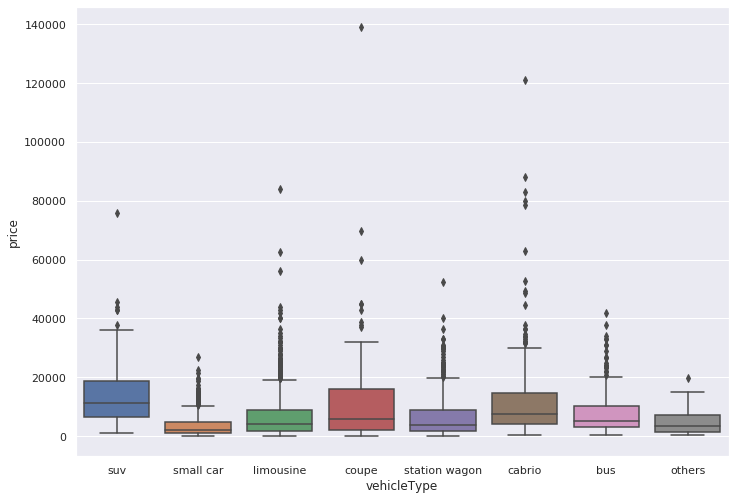

In [0]:
sns.boxplot(x='vehicleType',y='price',data=cars)

In [0]:
col=['seller','offerType','abtest']
cars.drop(columns=col,axis=1)

In [0]:
cars_s = cars.select_dtypes(exclude=[object])

In [0]:
correl = cars_s.corr()

In [0]:
round(correl,3)

In [33]:
cars_s.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS      0.590
Age          0.486
kilometer    0.444
postalCode   0.074
Name: price, dtype: float64

In [0]:
# Linear regression and random forest
# by omitting missing value
# imputing missing value

In [0]:
cars = cars_s.dropna(axis=0)

In [0]:
#converting categorical variables to dummy variables
cars=pd.get_dummies(cars,drop_first=True)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [0]:
x1 = cars.drop(['price'],axis='columns',inplace=False)

In [0]:
y1 = cars['price']

In [0]:
import numpy as np
prices = pd.DataFrame({"1:Before" :y1,'2:After': np.log(y1)})

In [0]:
y1 = np.log(y1)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2879, 4) (1235, 4) (2879,) (1235,)


In [0]:
# baseline model for omitted data
base_pred = np.mean(y_test)

In [0]:
base_pred=np.repeat(base_pred,len(y_test))

In [0]:
base_rmse = np.sqrt(mean_squared_error(y_test,base_pred))

In [48]:
print(base_rmse)

1.1258882775093897


In [0]:
lgr = LinearRegression(fit_intercept=True)

In [0]:
model = lgr.fit(x_train,y_train)

In [0]:
cars_pred = lgr.predict(x_test)

In [0]:
# Mean squared error
mse = mean_squared_error(y_test,cars_pred)

In [0]:
rmse = np.sqrt(mse)

In [54]:
print(rmse)

0.6637667808247734


In [59]:
# R Squared value
test1 = model.score(x_test,y_test)
train1 = model.score(x_train,y_train)
print(test1, train1)
# close so model is good

0.6524314815511804 0.6386118621692858


In [0]:
# diagonistics
residuals = y_test - cars_pred

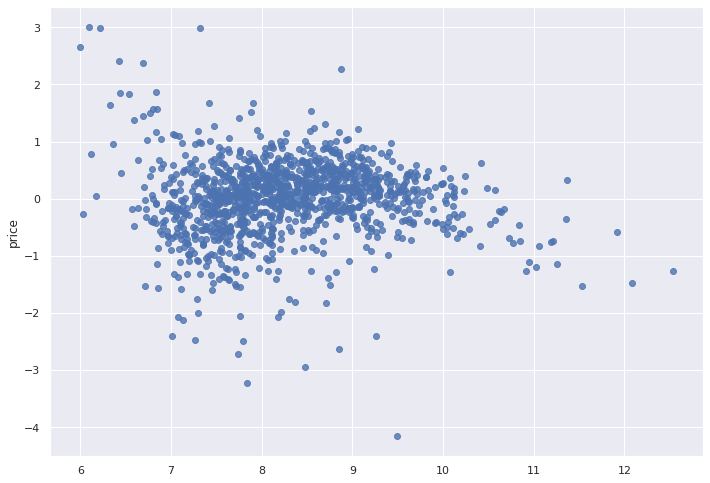

In [63]:
sns.regplot(x=cars_pred,y=residuals,scatter=True,fit_reg=False)
# residuals close to zero so good

In [62]:
residuals.describe()

count   1235.000
mean       0.003
std        0.664
min       -4.154
25%       -0.325
50%        0.062
75%        0.390
max        3.002
Name: price, dtype: float64

In [0]:
rf = RandomForestRegressor(n_estimators=100, max_features='auto',max_depth=100,min_samples_leaf=4,
                           min_samples_split=4, random_state=1)

In [0]:
model_rf = rf.fit(x_train,y_train)

In [0]:
predict_rf = rf.predict(x_test)

In [0]:
rf_mse = mean_squared_error(y_test,predict_rf)

In [0]:
rf_rmse = np.sqrt(rf_mse)

In [71]:
print(rf_rmse)

0.5691017122427137


In [74]:
test1 = model.score(x_test,y_test)
train1 = model.score(x_train,y_train)
print(test1, train1)

0.7445010087803177 0.8892422151295989


In [0]:
# model building with imputted data
cars_im = cars.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))

In [76]:
cars_im.isnull().sum()

price         0
powerPS       0
kilometer     0
postalCode    0
Age           0
dtype: int64

In [0]:
# converting categorical to dummies
cars_im = pd.get_dummies(cars_im,drop_first=True)

In [0]:
# separating input and outpput frames
x2 = cars_im.drop(['price'],axis='columns',inplace=False)

In [0]:
y2 = cars_im['price']

In [0]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x2,y2,test_size=0.3,random_state=3)

In [0]:
base_pred1 = np.mean(y_test1)

In [0]:
base_pred1 = np.repeat(base_pred1,len(y_test1))

In [0]:
base_rmse_im = np.sqrt(mean_squared_error(y_test1,base_pred1))

In [85]:
print(base_rmse_im)

8612.045941587598
